In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
dfx = pd.read_csv('./Training Data/Train.csv')
dfxtest = pd.read_csv('./Testing Data/Test.csv')

In [126]:
Y = dfx.target.values
X = dfx.values
X = X[:,:5]
Y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [127]:
X_test = dfxtest.values
X_test

array([[ 1.01525387e+00,  2.07620944e+00, -2.66434820e-01,
        -2.41808820e+00, -9.80502790e-01],
       [-3.75021204e-01,  9.53184528e-01,  6.26719138e-01,
         7.04405750e-01, -3.55489211e-01],
       [-1.02445225e+00,  9.62991107e-01, -4.07942004e-01,
        -1.86127383e+00,  4.55201351e-01],
       ...,
       [ 5.54727647e-01,  1.76824345e+00, -8.97787210e-01,
        -1.19366107e+00,  3.40563374e-01],
       [-1.62717246e+00,  8.56470994e-01, -5.65729519e-04,
         6.29386649e-01,  4.53382144e-01],
       [ 1.39310499e-01,  5.31597186e-01, -8.53107053e-01,
         3.16920076e-02,  1.71489304e+00]])

In [128]:
def h(x, theta):
    return theta[0]*x[0] + theta[1]*x[1] + theta[2]*x[2] + theta[3]*x[3] + theta[4]*x[4] + theta[5]

def grad(X, Y, theta):
    grad_ = np.zeros((6,))
    m = X.shape[0]
    for i in range(m):
        hx = h(X[i], theta)
        grad_[0] += (hx-Y[i])*X[i, 0]
        grad_[1] += (hx-Y[i])*X[i, 1]
        grad_[2] += (hx-Y[i])*X[i, 2]
        grad_[3] += (hx-Y[i])*X[i, 3]
        grad_[4] += (hx-Y[i])*X[i, 4]
        grad_[5] += (hx-Y[i])
    return grad_

def error(X, Y, theta):
    err = 0
    m = X.shape[0]
    for i in range(m):
        hx = h(X[i], theta)
        err += (hx-Y[i])**2
    return err

def grad_dec(X, Y):
    theta = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    err = []
    for i in range(100):
        gradient = grad(X, Y, theta)
        theta = theta - 0.001*gradient
        err.append(error(X, Y, theta))
    print(grad(X, Y, theta))
    return theta, err

In [129]:
theta, err = grad_dec(X, Y)

[-3.71405750e-07 -6.59860541e-07  9.85513128e-07  4.91638654e-07
 -4.65725633e-07 -4.65095646e-07]


In [130]:
print(theta)

[29.68187118 92.66247759  8.28062089 44.76773522  2.51916121  4.99096674]


In [146]:
theta = theta.reshape((6,1))
x = np.c_[X_test, np.ones(X_test.shape[0])]
y = x@theta
print(y)

[[ 1.14583689e+02]
 [ 1.18012815e+02]
 [-2.17398523e+01]
 [-4.39368985e+01]
 [-9.59148984e+01]
 [-4.45074240e+01]
 [-7.55665260e+01]
 [ 2.38208355e+01]
 [ 1.73835284e+02]
 [ 1.72849290e+02]
 [-1.05402312e+02]
 [-2.08020234e+01]
 [-3.91323777e+00]
 [ 1.22999186e+02]
 [ 4.03078842e+01]
 [ 4.57128495e+01]
 [-1.89628491e+02]
 [ 2.26125454e+01]
 [ 1.16410473e+01]
 [ 1.36342143e+02]
 [ 6.49162552e+01]
 [-6.19884884e+01]
 [-1.08194679e+02]
 [-7.41212747e+00]
 [-5.85239528e+01]
 [ 1.18889777e+01]
 [ 2.92376400e+01]
 [ 1.07687579e+02]
 [ 2.41468563e+01]
 [-2.61050120e+01]
 [ 1.10968076e+02]
 [-4.48797096e+01]
 [ 2.16799939e+02]
 [-1.38606052e+01]
 [-2.28603182e+02]
 [ 1.54896021e+02]
 [-2.22583390e+00]
 [ 1.27230344e+01]
 [-3.08307877e+02]
 [ 7.71107583e+01]
 [-8.12079177e+01]
 [-2.06632925e+02]
 [-2.38762881e+02]
 [ 1.34757365e+02]
 [-7.37514777e+01]
 [ 1.05463702e+02]
 [-3.59074927e+00]
 [ 2.06043839e+01]
 [-9.80187354e+01]
 [-2.75169049e+01]
 [ 1.08159001e+01]
 [-1.74463534e+02]
 [ 6.5155751

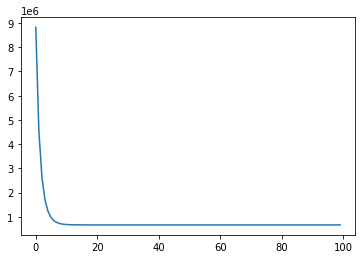

In [132]:
plt.plot(err)
plt.show()

In [133]:
err[-1]

664885.3048777862